The google doc is: 
https://docs.google.com/document/d/1aYOwxtQ6dyqCwKjSNZCamryjDybocJeBoUlUDZGpZ3k/edit?tab=t.0

Q3 below

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv, kv  # Bessel J et K


n1 = 1.53
n2 = 1.50
a  = 4.5e-6            
lambda_ = 1500e-9      

k0 = 2*np.pi/lambda_
V = a*k0*np.sqrt(n1**2 - n2**2)
print("V =", V)


m = 2  # change manually


x = np.linspace(1e-6, 14, 2000)  # 0<pa<V
p = x / a
qa = np.sqrt(V**2 - x**2)
q=qa/a


LHS = jv(m-1, x) / (x * jv(m, x))

RHS = kv(m-1, qa) / (qa * kv(m, qa)) 

#plot 

plt.figure(figsize=(7,5))
plt.plot(x, LHS, label="LHS")
plt.plot(x, RHS, label="RHS")
plt.axhline(0, color="gray", lw=0.7)
plt.xlabel("x = p·a")
plt.title("characteristic equation")
plt.ylim(-2, 2)
plt.legend()
plt.grid()
plt.show()


CODE FOR Question 6, below

V-number = 5.683070775744818
LP12 eigenvalue u = 3.831705970208964
w = 4.197061209940806


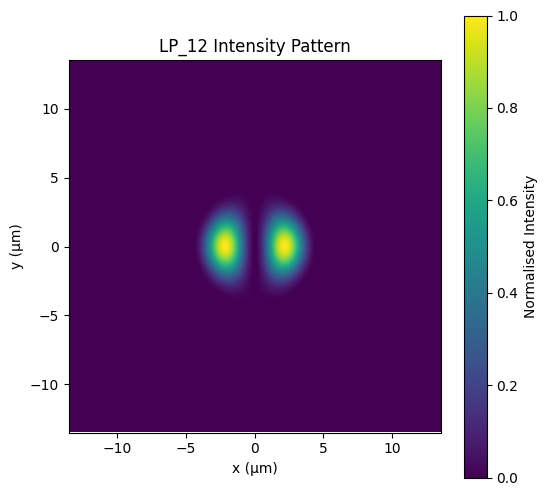

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special, optimize


# constants
n1 = 1.53
n2 = 1.50
a = 4.5            # (microns)
lambda_um = 1.5    # (microns)

k0 = 2*np.pi/lambda_um
V = k0 * a * np.sqrt(n1**2 - n2**2)

print("V-number =", V)

# l = 1 for LP12
l = 1


# characteristic equation def

def char_eq(u):
    w = np.sqrt(V**2 - u**2)
    return (special.jvp(l,u)/(u*special.jv(l,u)) + 
            special.kvp(l,w)/(w*special.kv(l,w)))


# roots
us = np.linspace(0.1, V-0.1, 3000)
vals = [char_eq(u) for u in us]
roots = []

for i in range(len(us)-1):
    if vals[i]*vals[i+1] < 0:
        root = optimize.brentq(char_eq, us[i], us[i+1])
        roots.append(root)

u = roots[1]                 # we want second root for LP12
w = np.sqrt(V**2 - u**2)

print("LP12 eigenvalue u =", u)
print("w =", w)

# the field functions
def psi(x,y):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y,x)
    field = np.zeros_like(r)

    inside = r <= a

    Jin = special.jv(l, u*r[inside]/a)
    C = special.jv(l,u)/special.kv(l,w)
    Kout = C * special.kv(l, w*r[~inside]/a)

    field[inside] = Jin*np.cos(phi[inside])
    field[~inside] = Kout*np.cos(phi[~inside])
    
    return field

# pixels and grid
N = 720
lim = 3*a
x = np.linspace(-lim, lim, N)
y = np.linspace(-lim, lim, N)
X,Y = np.meshgrid(x,y)

I = psi(X,Y)**2
I /= np.max(I)

# plotting
plt.figure(figsize=(6,6))
plt.imshow(I, extent=[-lim,lim,-lim,lim], origin='lower')
plt.title("LP_12 Intensity Pattern")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")
plt.colorbar(label="Normalised Intensity")
plt.show()


above the spatial distribution of the intensity of the mode is plotted (in x and y)

the approximation n_1 ~ n_2
we use the knowledge that:
𝐼 ∝ |𝐸𝑥|^2 + |𝐸𝑦|^2

i) we know from Q3 that u = 3.8317 and omega = 4.1971
ii) using the scalar field approximation the inside and outside the core:

inside:
\[
\psi_{\text{core}}(r,\phi) =
A J_1\left(\frac{u r}{a}\right)\cos(\phi), \quad r \le a
\]

outside:
\[
\psi_{\text{clad}}(r,\phi) =
B K_1\left(\frac{w r}{a}\right)\cos(\phi), \quad r > a
\]

and then intensity overall is: 
I (r, theta) ∝ |phi|^2

the image generated is in agreement to the theory and previous published calculations: High-power mid-infrared supercontinuum laser source using fluorotellurite fiber (Yao Chuanfei et al)




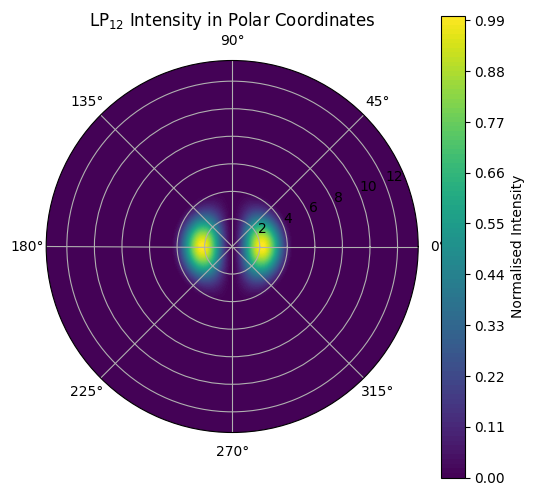

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

# constants
n1 = 1.53
n2 = 1.50
a = 4.5
lambda_um = 1.5

k0 = 2*np.pi/lambda_um
V = k0 * a * np.sqrt(n1**2 - n2**2)

u = 3.831706   # LP12 root 
w = np.sqrt(V**2 - u**2)
l = 1

# polar space
r = np.linspace(0, 3*a, 400)
theta = np.linspace(0, 2*np.pi, 400)
R, TH = np.meshgrid(r, theta)

# field in polar coordinates
C = special.jv(l,u)/special.kv(l,w)

Psi = np.zeros_like(R)
inside = R <= a

Psi[inside] = special.jv(l, u*R[inside]/a)*np.cos(l*TH[inside])
Psi[~inside] = C * special.kv(l, w*R[~inside]/a)*np.cos(l*TH[~inside])

I = Psi**2
I /= np.max(I)

# polar plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')
c = ax.contourf(TH, R, I, 100)
plt.title("LP$_{12}$ Intensity in Polar Coordinates")
plt.colorbar(c, label="Normalised Intensity")
plt.show()


The LP₁₂ field is naturally expressed in cylindrical coordinates (r,θ), however the intensity distribution is commonly visualised in Cartesian coordinates (x,y) to represent the physical fibre cross-section. Both representations are equivalent.

Below we display the intensity in x, y and z directions each: E_x, E_y and E_z 
(uses weak guidance approximation, where LP modes approximate the true vectors modes)

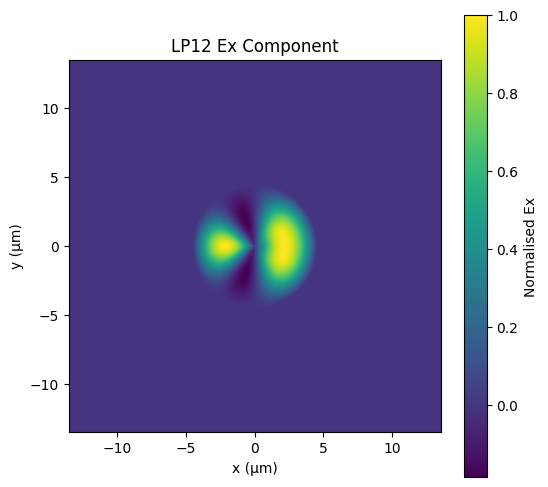

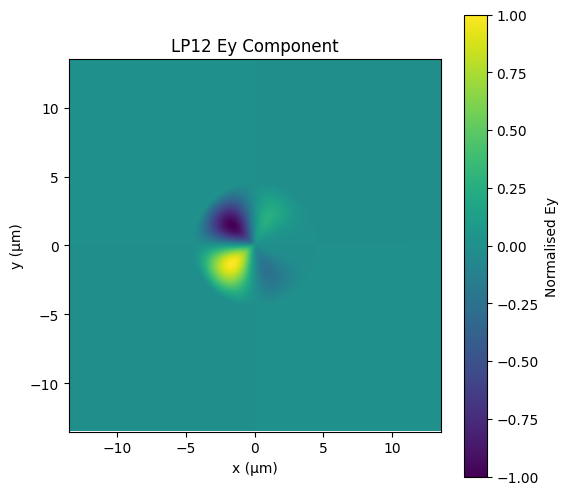

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

# -----------------------------
# Parameters (Group 3)
# -----------------------------
n1 = 1.53
n2 = 1.50
a = 4.5
lambda_um = 1.5

k0 = 2*np.pi/lambda_um
V = k0 * a * np.sqrt(n1**2 - n2**2)

# constants from prev qs
l = 1
u = 3.831706
w = np.sqrt(V**2 - u**2)

# cartesian grid
N = 400
lim = 3*a
x = np.linspace(-lim, lim, N)
y = np.linspace(-lim, lim, N)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
PHI = np.arctan2(Y, X)

# psi in core and then cladding
C = special.jv(l,u)/special.kv(l,w)
Psi = np.zeros_like(R)
inside = R <= a

Psi[inside] = special.jv(l, u*R[inside]/a) * np.cos(l * PHI[inside])
Psi[~inside] = C * special.kv(l, w*R[~inside]/a) * np.cos(l * PHI[~inside])

# APPROXIMATE vector components

Er = Psi
Ephi = -Psi * np.sin(l * PHI)
Ez = (u/V) * Psi

Ex = Er * np.cos(PHI) - Ephi * np.sin(PHI)
Ey = Er * np.sin(PHI) + Ephi * np.cos(PHI)

Ex /= np.max(np.abs(Ex))
Ey /= np.max(np.abs(Ey))
Ez /= np.max(np.abs(Ez))

plt.figure(figsize=(6,6))
plt.imshow(Ex, extent=[-lim,lim,-lim,lim], origin='lower')
plt.title("LP12 Ex Component")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")
plt.colorbar(label="Normalised Ex")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(Ey, extent=[-lim,lim,-lim,lim], origin='lower')
plt.title("LP12 Ey Component")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")
plt.colorbar(label="Normalised Ey")
plt.show()

# Ez is taken as proportional to ψ with scaling u/V. 

#plt.figure(figsize=(6,6))
#plt.imshow(Ez, extent=[-lim,lim,-lim,lim], origin='lower')
#plt.title("LP12 Ez Component")
#plt.xlabel("x (µm)")
#plt.ylabel("y (µm)")
#plt.colorbar(label="Normalised Ez")
#plt.show()
